# **CONTACT RECOMMENDATIONS**
### Part 1 : Data Understanding

### Part 2 : Data Preparation

### Part 3 : Modelling

### Part 4 : Evaluation

### Part 5 : Deployment

### Part 6 : Remarks

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction import FeatureHasher
import numpy as np
import uuid
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os
os.chdir('/content/drive/MyDrive/JOB-TASKS')
connections_train = pd.read_csv("connections_train.csv")
users = pd.read_csv("users.csv")

## **PART 1 : DATA UNDERSTANDING**





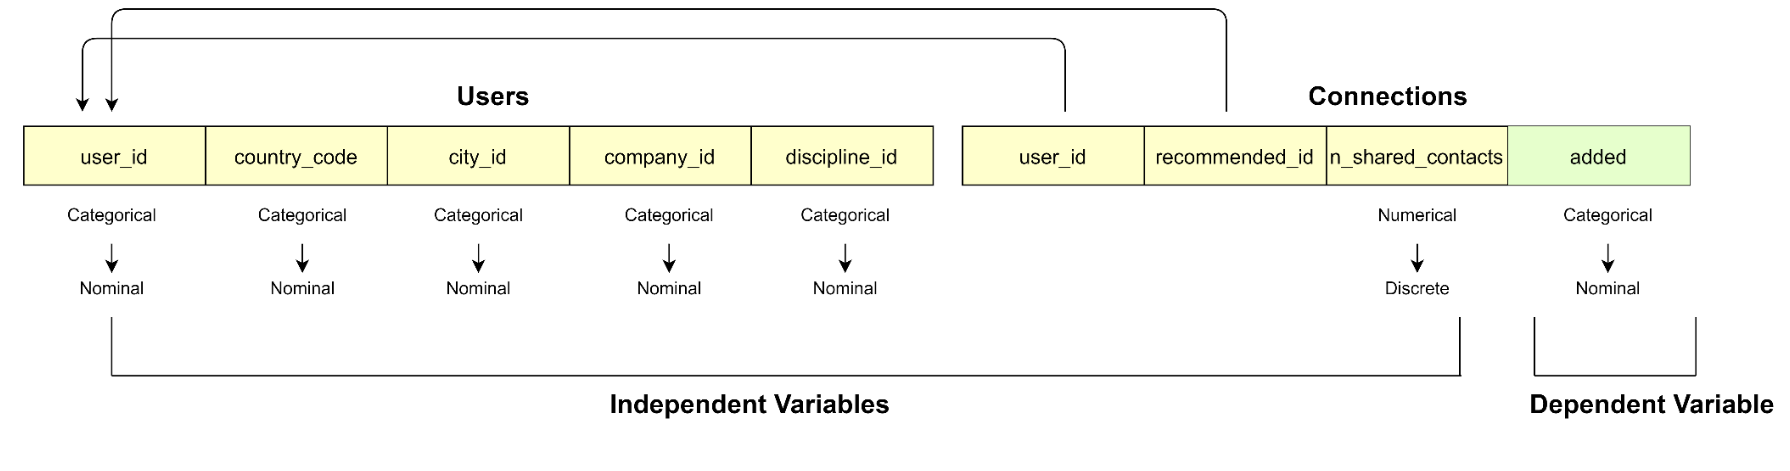

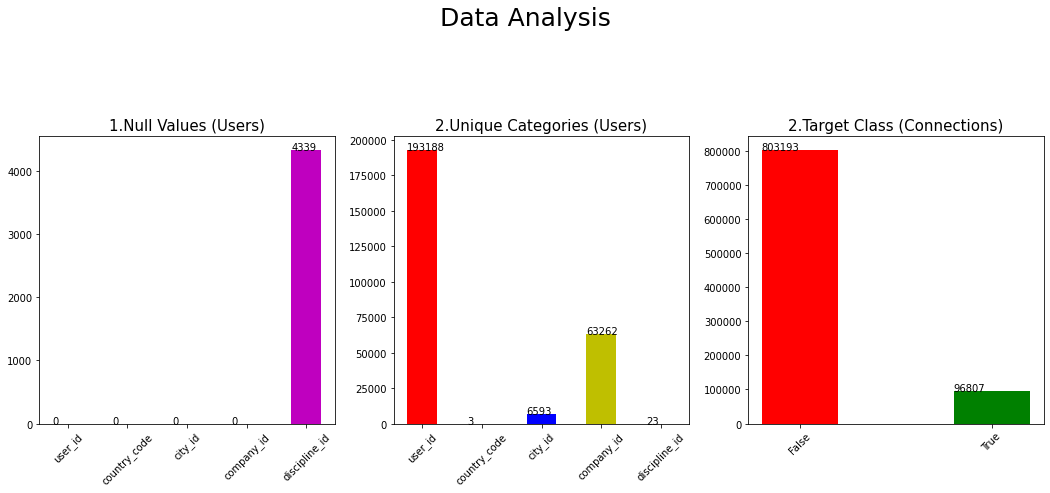

In [95]:
fig = plt.figure(figsize=(18, 18))
fig.suptitle('Data Analysis',fontsize=25)
width=0.5
colors=list('rgbymc')
gs = fig.add_gridspec(3,3)

#PLOT NULL VALUES
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('1.Null Values (Users)', size=15)
nulls=dict(users.isnull().sum())
indices=np.arange(len(nulls.keys()))
bars=ax1.bar(indices,nulls.values(),width,color =colors )
ax1.set_xticks(indices)
ax1.set_xticklabels(nulls.keys(), rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)


#PREPROCESS
users['discipline_id']=users['discipline_id'].fillna(0)
users['city_id']=users['city_id'].apply(str)
users['company_id']=users['company_id'].apply(str)
users['discipline_id']=users['discipline_id'].apply(str)
uniques={}
uniques['user_id']=users['user_id'].nunique()
uniques['country_code']=users['country_code'].nunique()
uniques['city_id']=users['city_id'].nunique()
uniques['company_id']=users['company_id'].nunique()
uniques['discipline_id']=users['discipline_id'].nunique()

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('2.Unique Categories (Users)', size=15)
indices=np.arange(len(uniques.keys()))
bars=ax2.bar(indices,uniques.values(),width,color = colors)
ax2.set_xticks(indices)
ax2.set_xticklabels(uniques.keys(), rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)


uniques=dict(connections_train['added'].value_counts())
ax3 = fig.add_subplot(gs[0, 2])
ax3.set_title('2.Target Class (Connections)', size=15)
indices=np.arange(len(uniques.keys()))
bars=ax3.bar(indices,uniques.values(),width-0.1,color = colors)
ax3.set_xticks(indices)
ax3.set_xticklabels(uniques.keys(), rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.show()

### Observations
* The categorical variable *discipline_id* has NULL values. 
* There are large number of categories in *city_id*, *company_id*, *user_id*
* Huge data imbalance of target variables. *False* class (majority) has more data than *True* class (minority)




---



# **PART 2 : DATA PREPARATION**

* The categorical variable *discipline_id* has *null* values. 
> It is grouped into a new category called *unknown*
* There are large number of categories in *city_id*, *company_id*, *user_id*
> a) OneHot encoded representation is not feasible in practise due to large cardinality<br/> b) Embeddings can be learnt with neural networks to represent such categories from very high to low dimensions <br/> c) Alternate solution is to represent the features with Hashing trick that transforms data from very high dimensions to low dimensions, no collisions. (implemented here)
* Huge class imbalance of target variables. *False* class (majority) has more data than *True* class (minority)
> a) Can be handled with higher sampling rate of minority class during training
<br/> b) Manipulating loss function can handle this problem as well (implemented here)

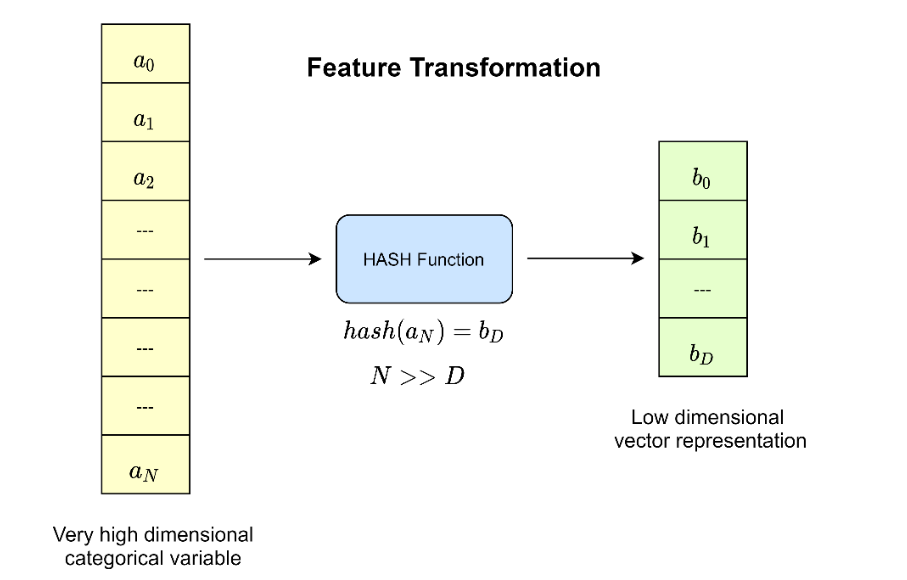



---



# **PART 3 : MODELLING**



* Neural Networks have the ability to learn by itself from the underlying training data
* Good generalization of the data set
* Detects complex non-linear relationship between dependent and independent variables
> a) 8 Linear layers <br/>
> b) Relu activation functions introduces non-linearity to the model <br/>
> c) Batch normalization stablizes the learning process and reduces the number of epochs
* Data imabalance is handled by manipulating loss function. More weightage is given to the minority class.

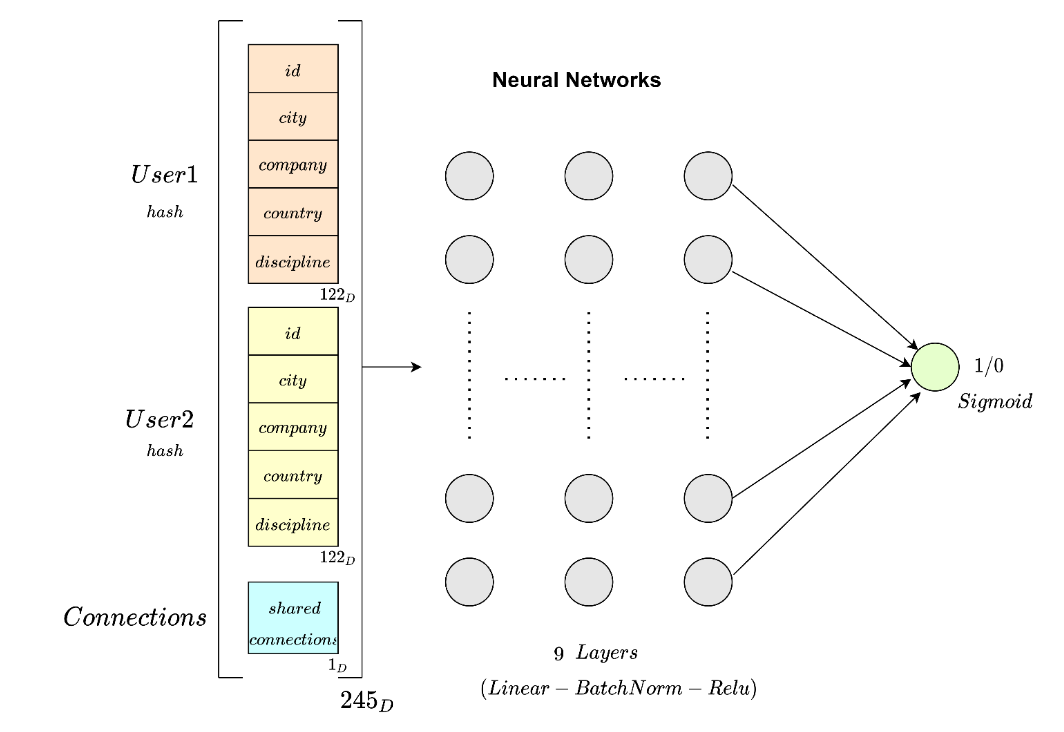

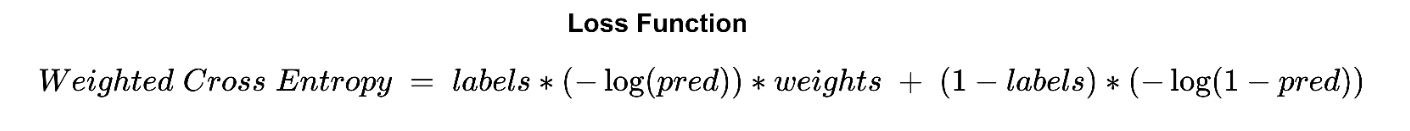



---



# **PART 4 : EVALUATION**



---



# **PART 5 : DEPLOYMENT**

* Integration to other XING modules can be done by exposing this contact recommendation service as a web micro service using flask app
* JSON contracts are designed for the consistency of request and response data format
* This web service can be dockerized for continous integration and deployment

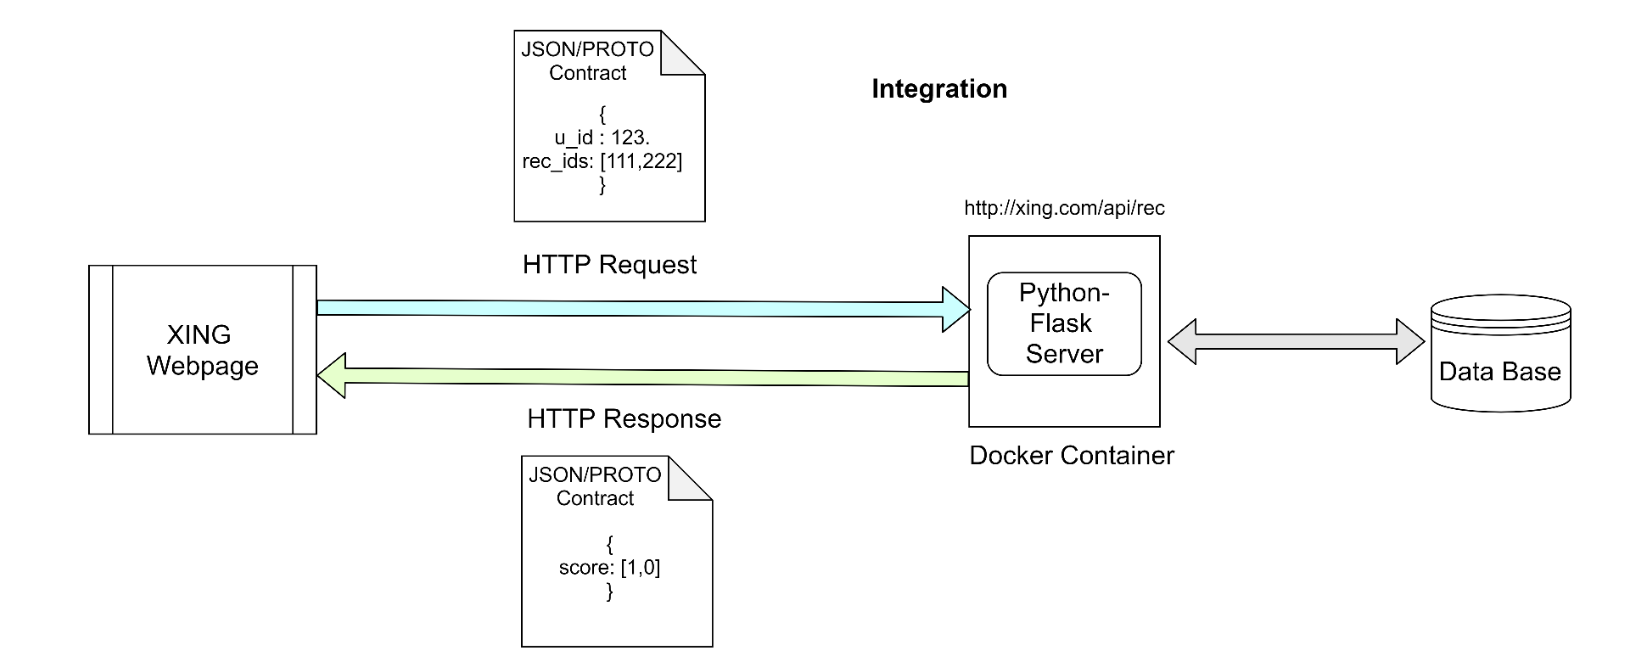



---



# **PART 6 : REMARKS**

* Deep learning methods are good for generalization
* Tranditional information retrieval can be used for personalization
* In production systems, perhaps building a hybrid recommender systems may further improve results
* Python script containing data loading and training procedure is located in the current directory



---

